In [1]:
import pickle
import numpy as np
import os
import torch
import torch.nn as nn
import re
import sys
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)

from sr_model.models.models import AnalyticSR, STDP_SR
from datasets import inputs
import configs
from utils import get_firing_field

device = 'cpu'

/Users/chingfang/Code/sr-project/datasets/inputs.py:12: UserWarning: Emily's experimental data could not be loaded.
  warnings.warn("Emily's experimental data could not be loaded.")
/Users/chingfang/Code/sr-project/datasets/sf_inputs_discrete.py:19: UserWarning: Emily's experimental data could not be loaded.
  warnings.warn("Emily's experimental data could not be loaded.")


In [11]:
num_states = 20

# Test dataset
dset = inputs.Sim1DWalk(num_steps=500, num_states=num_states, left_right_stay_prob=[0.5, 2, 1])
dg_inputs = torch.from_numpy(dset.dg_inputs.T).float().to(device).unsqueeze(1)

retrieval_steps = np.arange(200, 300)

# Load that model and test
net = STDP_SR(num_states=num_states, gamma=0.4)
net.set_num_states(num_states)
outs = []
for step in range(dset.num_steps):
    curr_dg_input = dg_inputs[step].unsqueeze(0)
    reset = True if step == 0 else False
    retrieval_mode = step in retrieval_steps
    update = True if not retrieval_mode else False
    gamma = None if not retrieval_mode else 0.9
    with torch.no_grad():
        _, out = net(curr_dg_input, update=update, reset=reset, gamma=gamma)
        outs.append(out)
outputs = torch.stack(outs).squeeze()

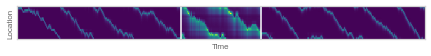

In [31]:
plt.figure(figsize=(6.5, 0.75))
plt.imshow(outputs.T, cmap='viridis', aspect=2)
plt.xticks([]); plt.yticks([])
plt.ylabel('Location')
plt.xlabel('Time')
plt.axvline(retrieval_steps[0], color='white')
plt.axvline(retrieval_steps[-1], color='white')
plt.gca().spines[:].set_visible(True)
plt.tight_layout()
plt.savefig('../figures/3h.png', dpi=300, transparent=True)
plt.show()

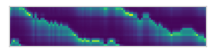

In [37]:
plt.figure(figsize=(3, 1.))
plt.imshow(outputs.T[:,retrieval_steps], cmap='viridis', aspect=1)
plt.xticks([]); plt.yticks([])
plt.gca().spines[:].set_visible(True)
plt.tight_layout()
plt.savefig('../figures/3hleft.png', dpi=300, transparent=True)
plt.show()

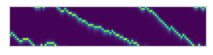

In [38]:
plt.figure(figsize=(3, 1.))
plt.axes().set_aspect(10)
plt.imshow(outputs.T[:,-retrieval_steps.size:], cmap='viridis')
plt.xticks([]); plt.yticks([])
plt.gca().spines[:].set_visible(True)
plt.tight_layout()
plt.savefig('../figures/3hright.png', dpi=300, transparent=True)
plt.show()